In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
list(df.sex.unique())

['female', 'male']

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df.drop_duplicates(keep='first',inplace=True)

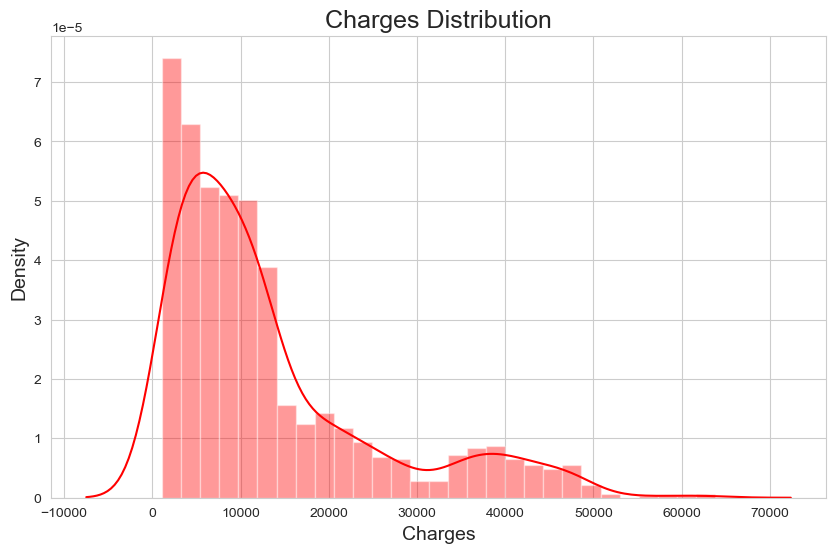

In [13]:
#Univariate Analysis for Numerical Features

#Charges

plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

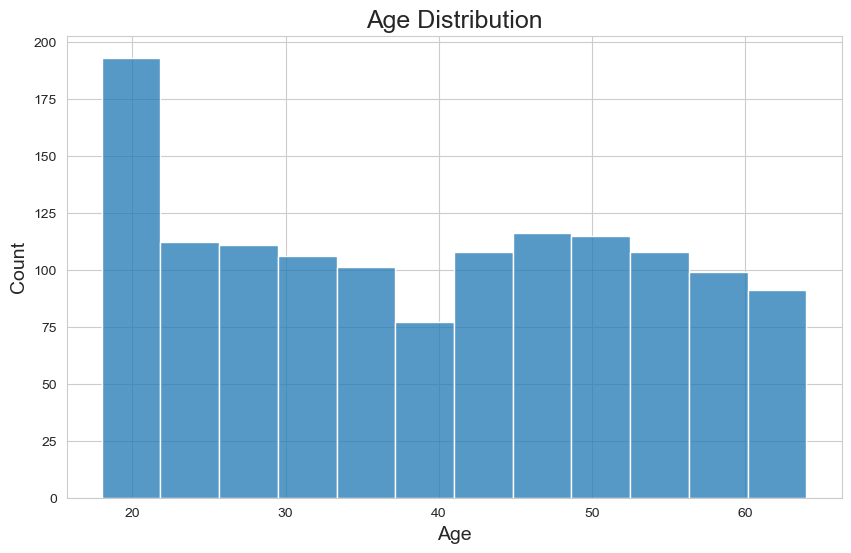

In [14]:
#Age
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

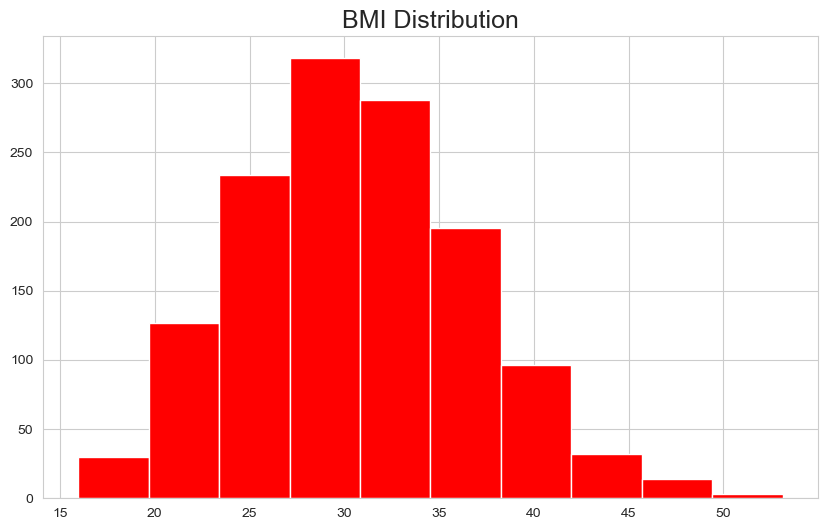

In [15]:
#BMI

plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='r')
plt.title('BMI Distribution',size=18)
plt.show()

In [19]:
data_pie = df['smoker'].value_counts().rename_axis('Smokers').reset_index(name='smokers_count')



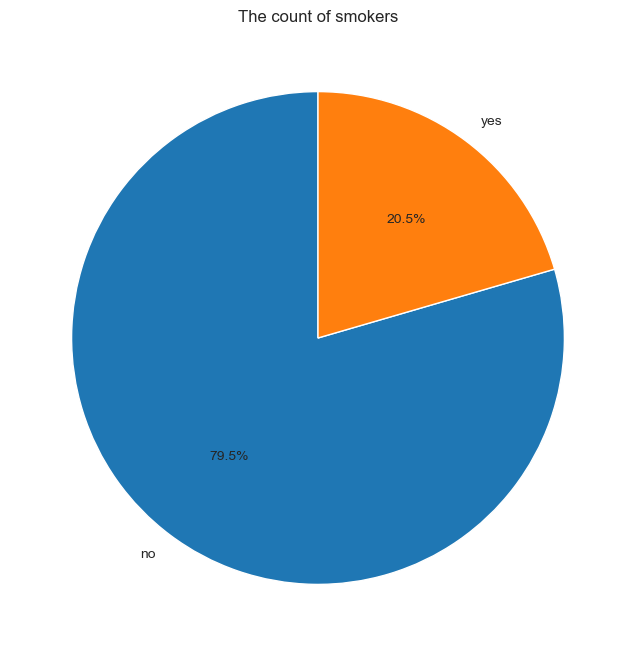

In [26]:
plt.figure(figsize=(8,8))

plt.pie(data_pie.smokers_count,labels = data_pie.Smokers,startangle=90,autopct='%.1f%%') 
plt.title('The count of smokers')

plt.show()



In [46]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

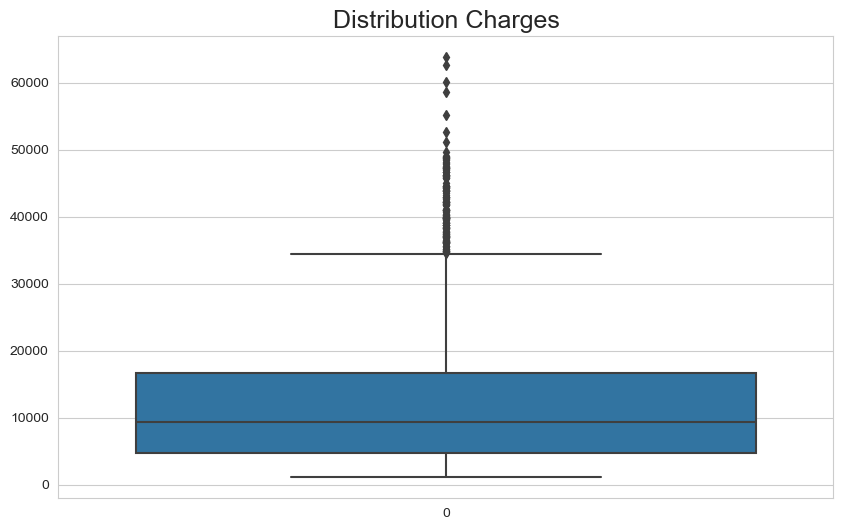

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()


In [28]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


11911.37345


In [29]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


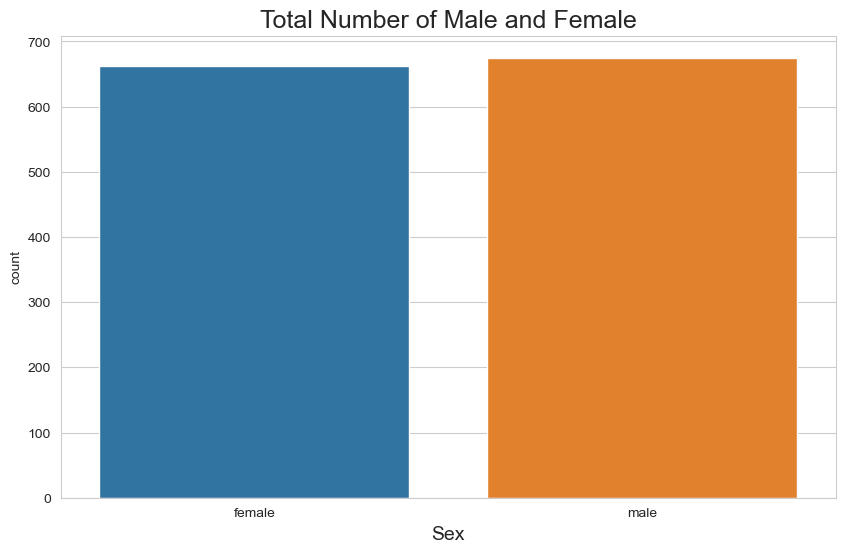

In [30]:
#Univariate Analysis for Categorical Features
#Gender

plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()


Text(0.5, 1.0, 'Smoker vs Charges')

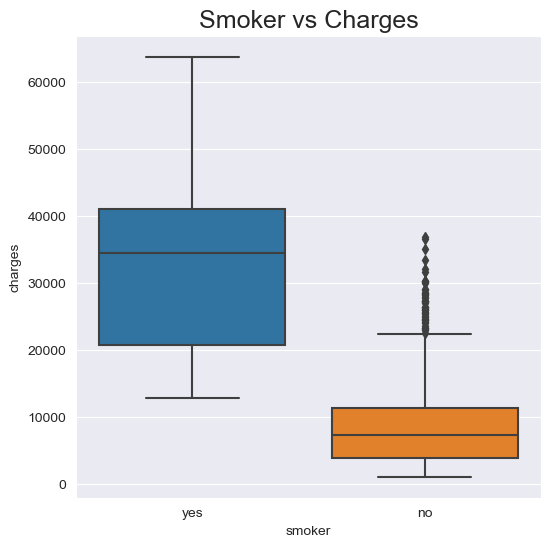

In [38]:
#Smoker vs Charges

plt.figure(figsize =(6,6))

sns.set_style("darkgrid")

sns.boxplot(x='smoker',y='charges', data=df)

plt.title('Smoker vs Charges', size=18)



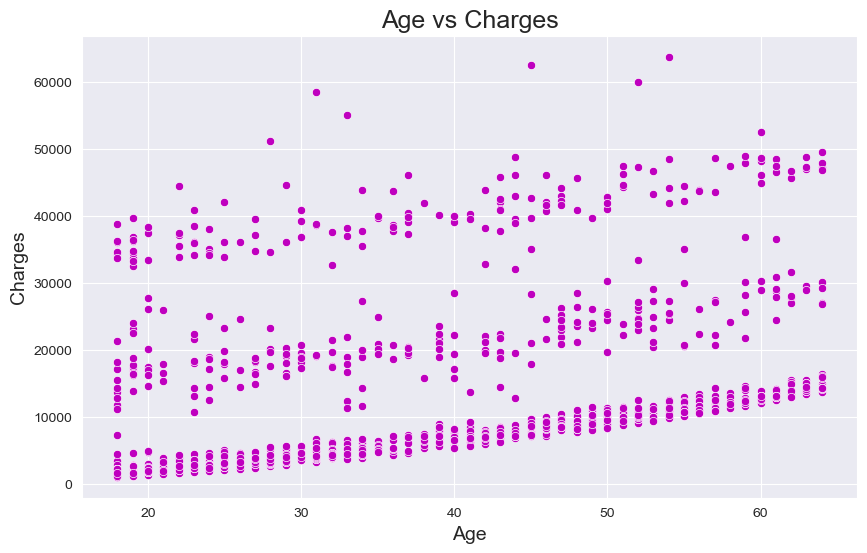

In [39]:
#Age vs Charges

plt.figure(figsize = (10,6))

sns.scatterplot(x='age', y='charges', color='m',data=df) 

plt.title('Age vs Charges', size=18) 
plt.xlabel('Age', size=14)

plt.ylabel('Charges', size=14)

plt.show()


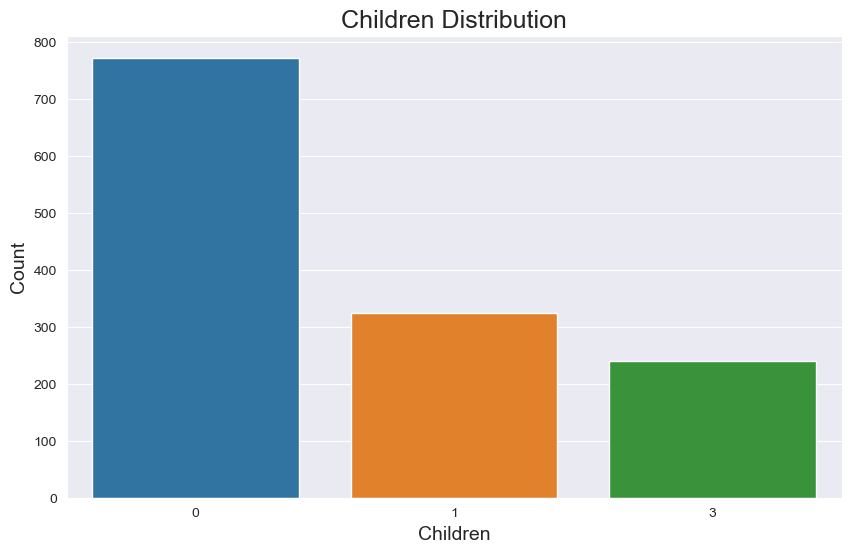

In [45]:
#Children

plt.figure(figsize = (10,6))
sns.countplot(df.children, x= df.children)

plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

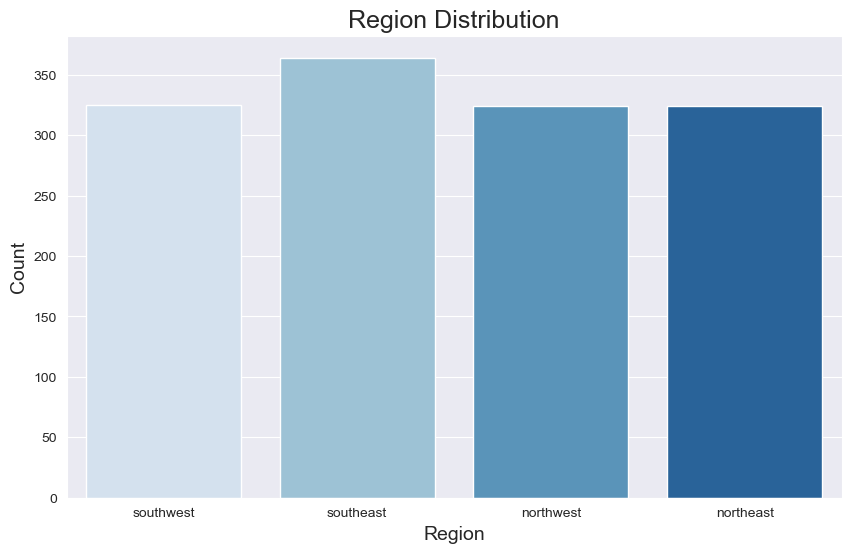

In [48]:
#Region

plt.figure(figsize = (10,6))
sns.countplot(df.region ,x = df.region ,palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()


In [49]:
print('Correlation between age and charges is : {}'.format(round(df.corr()['age']['charges'],3)))


ValueError: could not convert string to float: 'female'

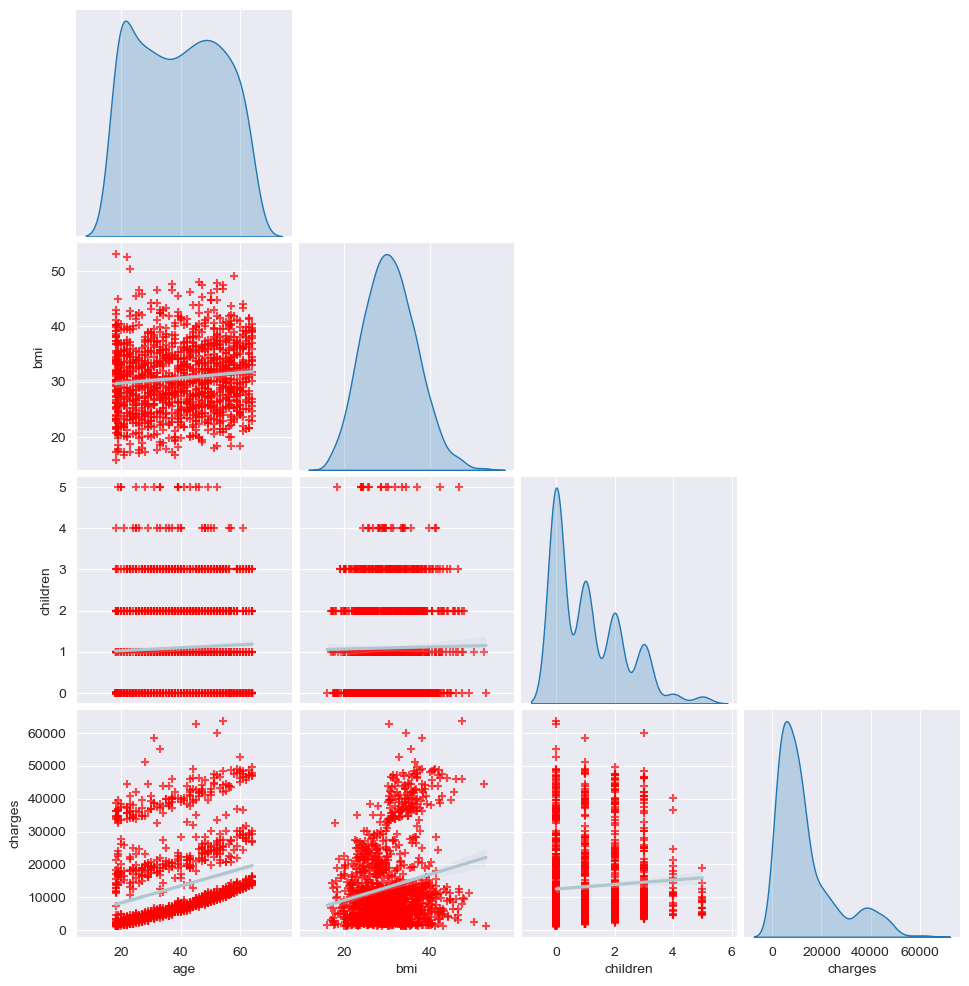

In [50]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);